# Trabajando con mínimos cuadrados


In [1]:
import numpy as np
import pandas as pd
from scipy import optimize 

import matplotlib.pyplot as plt
import numpy.typing as npt

## Trabajando con la encuesta

In [2]:
data = pd.read_csv('https://raw.githubusercontent.com/jmbarrios/ModelacionII-20222/main/data/data_clase.csv')

In [3]:
data

,length_to_school,time_to_school,main_transport
0,3.07,25,Metrobús
1,5.35,60,Camión
2,24.25,120,Metro
3,8.20,40,Camión
4,7.54,45,Metrobús
5,28.00,75,Auto
6,4.80,40,Camión
7,22.00,120,Metro
8,6.75,30,Metro
9,7.03,100,Camión


In [ ]:
?data.plot

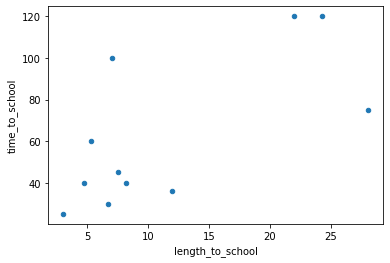

In [4]:
data.plot(x='length_to_school', y='time_to_school', kind='scatter')

### Problema
Encontrar el parámetro $\beta$ tal que 
$$
\texttt{time_to_school} = \beta * \texttt{length_to_school}.
$$

In [5]:
def least_square(y: npt.ArrayLike, X: npt.ArrayLike) -> np.array:
    ''' función para calcular los coeficientes de la recta de mínimos cuadrados

    Parameters
    ----------
    y: np.array datos dependientes
    x: np.array matriz de observaciones de regresores

    Returns
    -------
    np.array vector con coeficientes de la recta
    '''
    xt_x = X.T @ X
    return np.linalg.inv(xt_x) @ (X.T @ y) 

In [6]:
y = data['length_to_school'].to_numpy()
X = data['time_to_school'].to_numpy()
X = X[:, np.newaxis]
X = np.c_[np.ones(X.shape[0]), X]
y = y[:, np.newaxis]

In [7]:
X

array([[  1.,  25.],
       [  1.,  60.],
       [  1., 120.],
       [  1.,  40.],
       [  1.,  45.],
       [  1.,  75.],
       [  1.,  40.],
       [  1., 120.],
       [  1.,  30.],
       [  1., 100.],
       [  1.,  36.]])

In [8]:
beta = least_square(y, X)

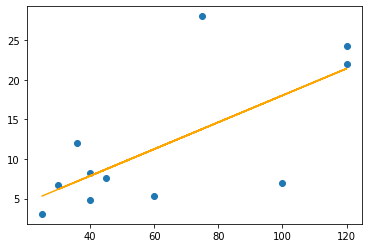

In [9]:
plt.scatter(X[:,1], y)
plt.plot(X[:,1], X @ beta, color='orange')

## Ajustando temperaturas

In [10]:
temp_data = pd.DataFrame({ 
    'temp_max': [17,  19,  21,  28,  33,  38, 37,  37,  31,  23,  19,  18] , 
    'temp_min': [-62, -59, -56, -46, -32, -18, -9, -13, -25, -46, -52, -58]
    }, index = np.arange(12) + 1)

In [11]:
temp_data

,temp_max,temp_min
1,17,-62
2,19,-59
3,21,-56
4,28,-46
5,33,-32
6,38,-18
7,37,-9
8,37,-13
9,31,-25
10,23,-46


Usaremos la función `optimize.curve_fitting`

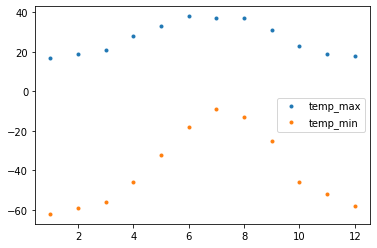

In [12]:
temp_data.plot(kind='line', style='.')

### Problema
Usar el modelo
$$
f(t, \textrm{avg}, A, \omega, b) = \textrm{avg} + A\cos(\omega t + b).
$$
Para encontrar los parámetros que ajusten mejor para el conjunto de temperaturas máximas y otros para las temperaturas mínimas.

Es importante considerar que el periodo de la función debe de ser anual, esto impone restricciones en el término $\omega t + b$ generalmente es mejor factorizar esto en la forma
$$
    \omega t + b = \frac{2\pi}{t_{\max}}(t+t_{\textrm{offset}}),
$$
donde el $t_{\max}$ se encargara de controlar el periodo y $t_{\textrm{offset}}$ ajusta los picos de la función coseno.


In [13]:
?optimize.curve_fit

In [14]:
temp_max = temp_data['temp_max'].to_numpy()
temp_min = temp_data['temp_min'].to_numpy()

time = np.arange(12) + 1

In [15]:
def yearly_temperature_model(
    time: npt.ArrayLike,
    temp_avg: npt.ArrayLike, 
    temp_var: npt.ArrayLike, 
    time_offset: npt.ArrayLike):
    ''' modelo de aproximacion de temperatura anual 
    Parameters
    ----------
    time: np.array
    temp_avg: np.array
    temp_var: np.array
    time_offset: np.array

    Returns
    -------
    np.array regresa la temperatura modelada
    '''
    return temp_avg + temp_var*np.cos((2*np.pi/12)*(time-time_offset))

In [16]:
initial_guess_max = (
    25,  # en promedio la temp. max ronda los 25 grados
    10,  # tiene aproximadamente una variacion de 10 grados
    6    # el valor máximo lo alcanza en el mes 6
)
initial_guess_min = (-40, 20, 6)

In [17]:
fitted_params_max, cov_params_max = optimize.curve_fit(
    yearly_temperature_model, 
    time, 
    temp_max, 
    p0=initial_guess_max)

In [18]:
fitted_params_min, cov_params_min = optimize.curve_fit(
    yearly_temperature_model, 
    time, 
    temp_min, 
    p0=initial_guess_min)

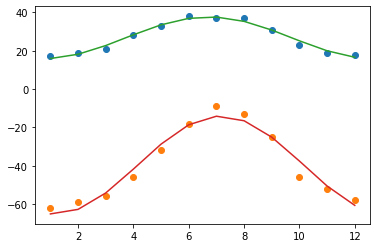

In [19]:
plt.plot(time, temp_max, 'o')
plt.plot(time, temp_min, 'o')
plt.plot(time, yearly_temperature_model(time, *fitted_params_max), '-')
plt.plot(time, yearly_temperature_model(time, *fitted_params_min), '-')

In [20]:
fitted_params_max

array([26.75      , 10.93254951,  6.72348005])

In [21]:
fitted_params_min

array([-39.66666667,  25.58169521,   7.15603649])